<a href="https://colab.research.google.com/github/Ashish-17CSE/Machine_Learning_Algorithm/blob/main/Predict_the_prices_of_stocks_using_LSTM_network_or_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predicting the google stock price**

# **Part 1 - Data Preprocessing**

In [1]:
# Importing the Libraries 

import numpy as np #allow to make arrays
import matplotlib.pyplot as plt  #visualize results on charts 
import pandas as pd #import dataset and manage easily

Data Downloaded from the kaggle

In [3]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

#need to make into numpy arrays because only nump arrays can be input values in keras
training_set = dataset_train.iloc[:, 1:2].values 


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
#fit (gets min and max on data to apply formula) tranform(compute scale stock prices to each formula)

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258): # upper bound is number of values 
  X_train.append(training_set_scaled[i-60:i, 0]) #takes 60 previous stock prices from 60 past stock prices
  y_train.append(training_set_scaled[i, 0]) #contains stock price learned to predict 
X_train, y_train = np.array(X_train), np.array(y_train)  # make into numpy arrays 

# Reshaping- add dimension in numpy array 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# **Part 2 - Building the RNN stacked LSTM with dropout regularization to prevent overfitting**

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
# Initialising the RNN
regressor = Sequential()

In [21]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [23]:
# Adding a second LSTM Layer and some Dropuot regularisation 
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [24]:
# Adding a third LSTM Layer and some Dropuot regularisation 
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [25]:
# Adding a fourth LSTM Layer and some Dropuot regularisation 
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [26]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [29]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 247ms/step - loss: 0.0013
Epoch 2/100
38/38 [==============================] - 14s 368ms/step - loss: 0.0012
Epoch 3/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0013
Epoch 4/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0015
Epoch 5/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0014
Epoch 6/100
38/38 [==============================] - 7s 184ms/step - loss: 0.0015
Epoch 7/100
38/38 [==============================] - 7s 187ms/step - loss: 0.0014
Epoch 8/100
38/38 [==============================] - 7s 183ms/step - loss: 0.0012
Epoch 9/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0012
Epoch 10/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0012
Epoch 11/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0014
Epoch 12/100
38/38 [==============================] - 9s 238ms/step - loss: 0.0013
Epoch 13/100

# **Part 3 - Making the predictions and visualising the results**

In [33]:
# Load the real stock prices of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [38]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

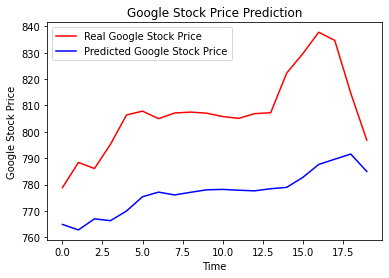

In [39]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()